1) import libraries
2) import dataset
3)perform the data analysis (dm,dc,de,dv,eda)
4) data preprocessing-feature Engineering(encoders,scaling,feature importance/selection,hyper parameter tuning etc..)
5) splitting of data into sets -cv(kfold,stratifiedfoldor loocv)
6)model selection
7) train the model
8) test the model
9) performance metrics-confusion metrics,accuracy_Score

#PANDAS -PROFILING --> DRAG AND DROP SURFACE NO NEED OF CODING ,IT DOES DATA CLEANING,VISUALIZATION

# IMPORTING LIBRARIES

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


#import the datasets

In [22]:
df=pd.read_csv("creditcard.csv")

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df.shape

(284807, 31)

In [25]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
# class is our target
df.Class.value_counts()
# THE BELOW DATA IS IMBALANCED I.E 0 CLASS HAS MORE POINTS THAN 1 CLASS SO THERE'S MAX PROBABILITY THAT MODEL TRAINS ON CLASS 0 AND GIVES INACCURATE ANS

,count
Class,
0,284315
1,492


<Axes: >

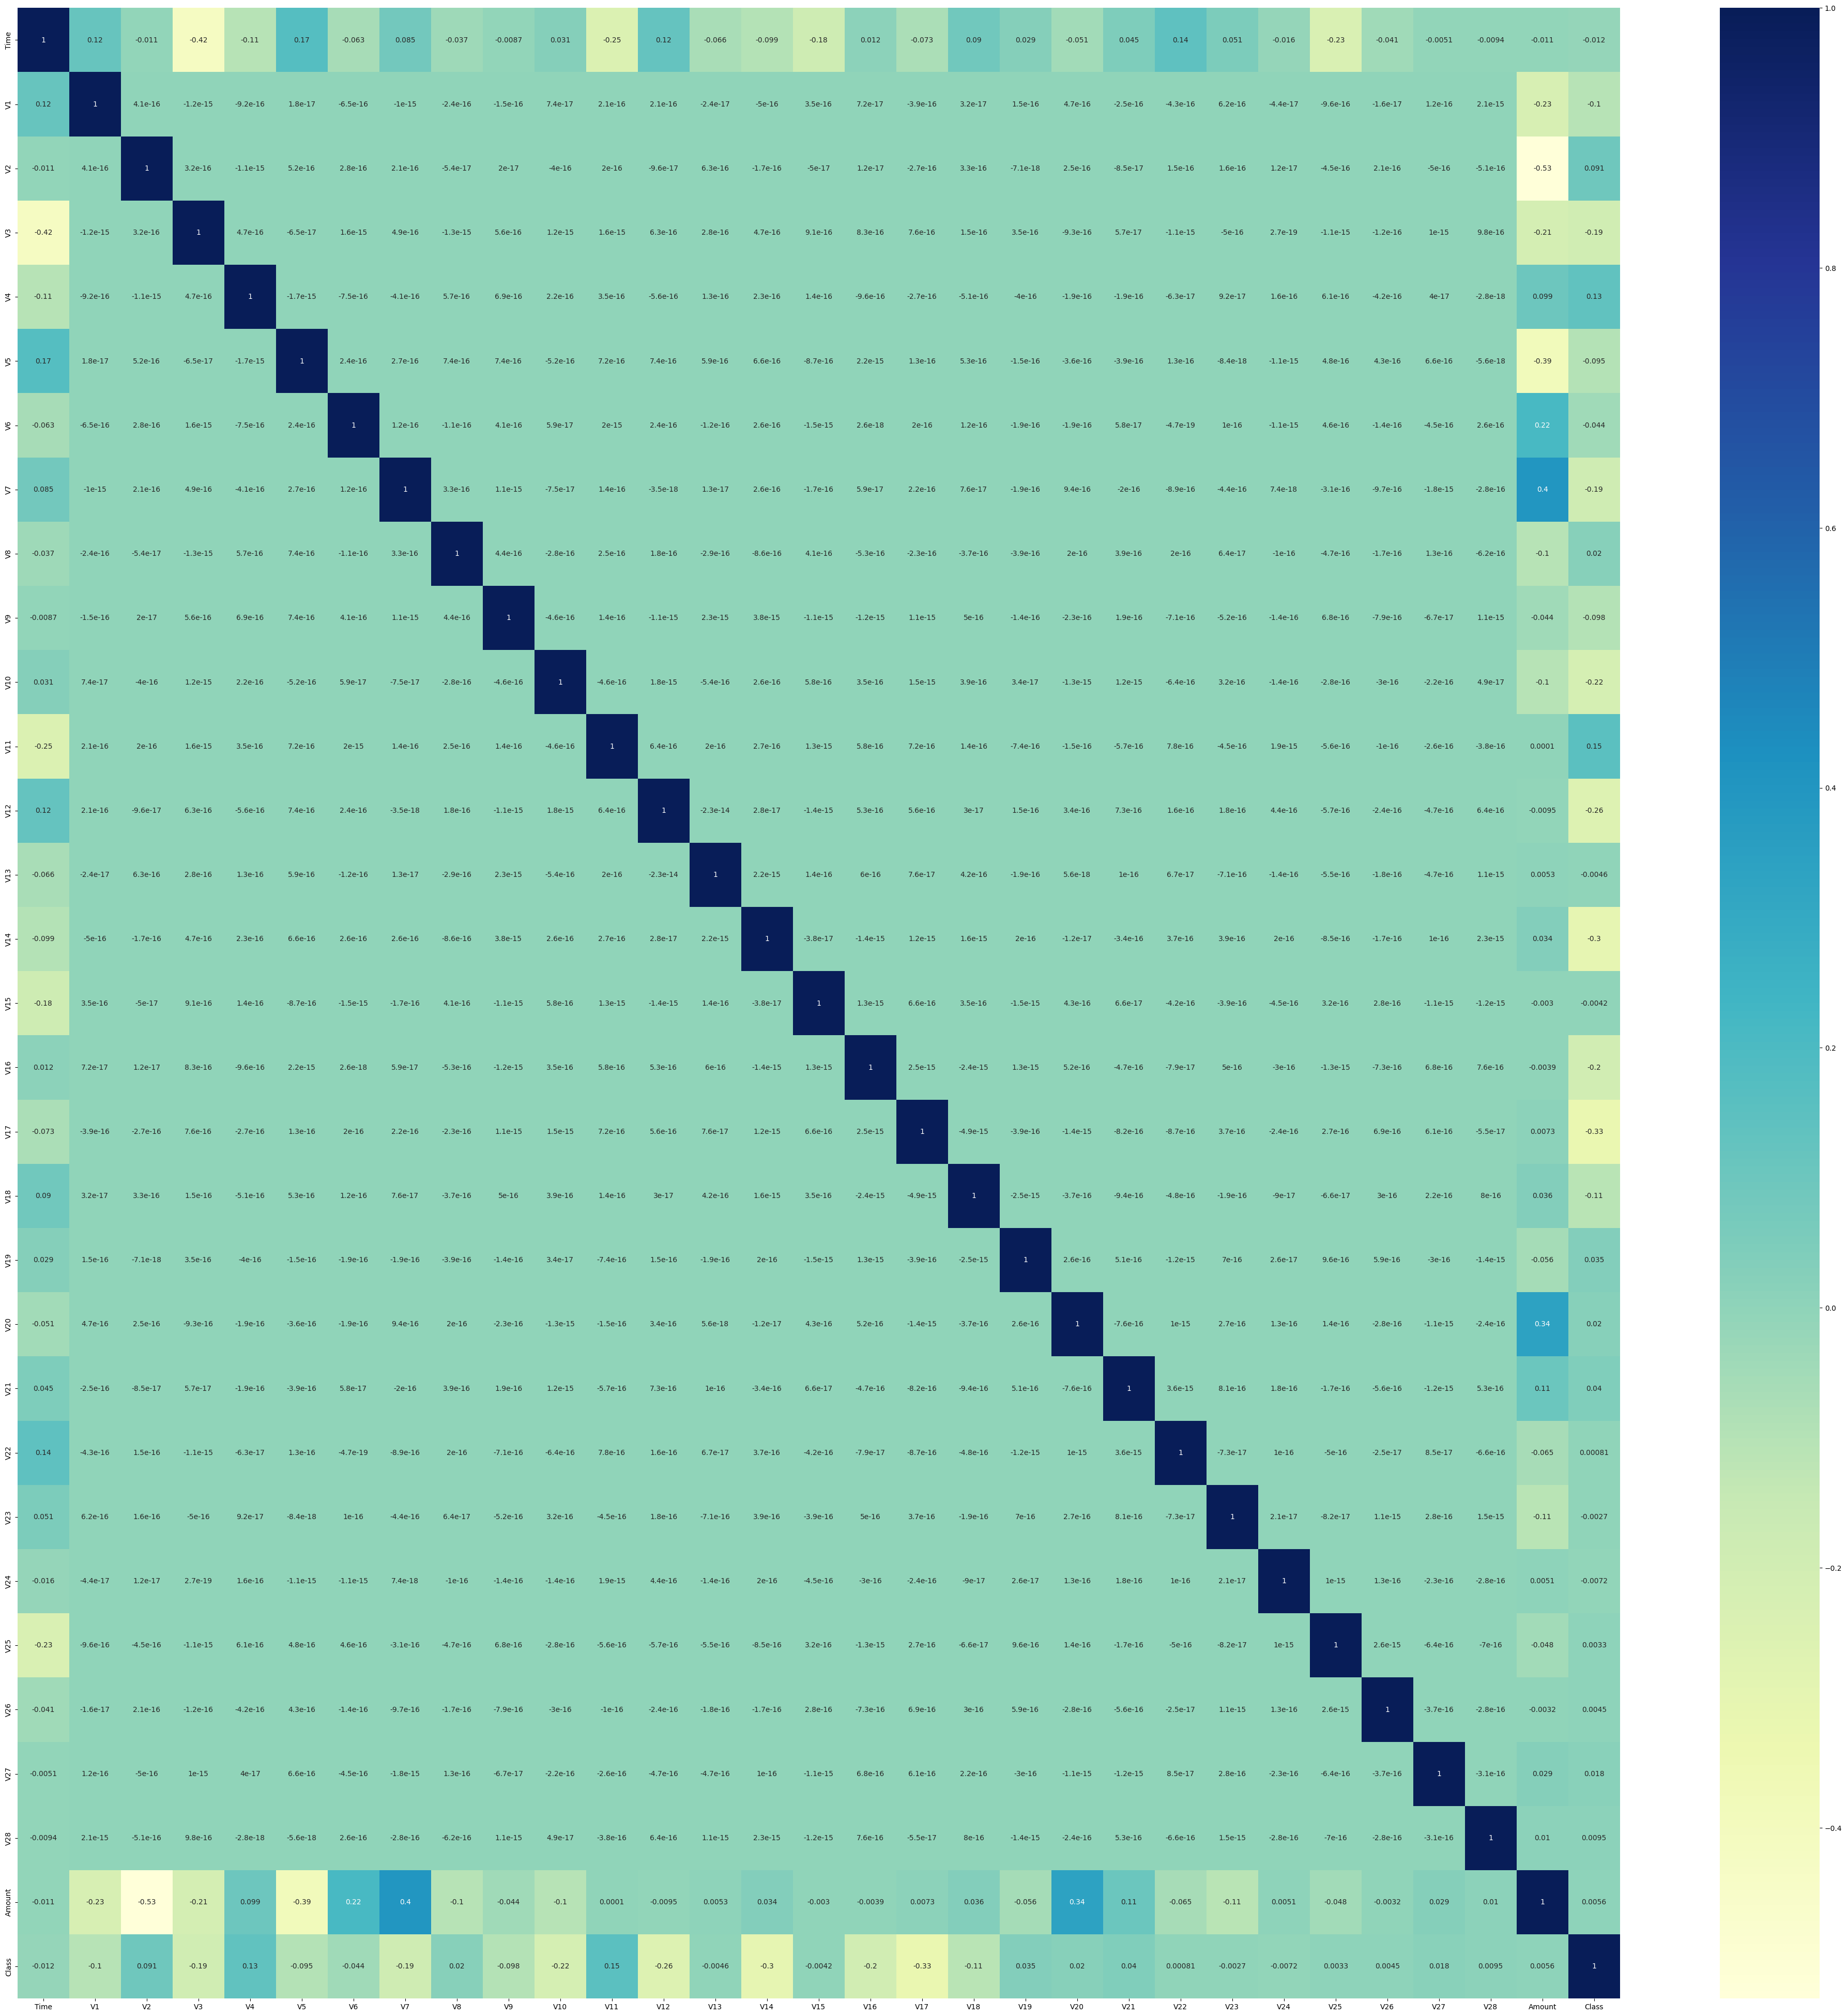

In [27]:
# TO BALANCE THIS WE USE CROSS -VALIDATION TECHNIQUES LIKE STRATIFIED K FOLD...
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

feature importance/selection

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
# Drop rows with any missing values in the features (x)
x = x.dropna()

# Since we dropped rows from x, we also need to drop the corresponding rows from y
y = y[x.index]


In [30]:
model=ExtraTreesClassifier()
model.fit(x,y).get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [32]:
# show where the y has nan values
y[y.isna()]

,Class


In [33]:
# fill the nan value in 25837
y.fillna(0,inplace=True)

In [34]:
x[x.isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
model.feature_importances_

array([0.01669994, 0.01351313, 0.01383987, 0.03159861, 0.04349819,
       0.01283481, 0.01348544, 0.01923653, 0.01369368, 0.03269429,
       0.07389567, 0.07342781, 0.11284998, 0.01194904, 0.10490404,
       0.01232809, 0.06908315, 0.14105387, 0.05176616, 0.01354422,
       0.0135438 , 0.01768458, 0.01241388, 0.00994199, 0.01079358,
       0.01035183, 0.01441033, 0.01246225, 0.01121315, 0.01128809])

In [37]:
plots=features.nlargest(20,features)

In [38]:
plots

,0
V17,0.125491
V12,0.116897
V14,0.114399
V11,0.095906
V10,0.078614
V16,0.061585
V3,0.034571
V18,0.033129
V4,0.032765
V9,0.030368


<Axes: >

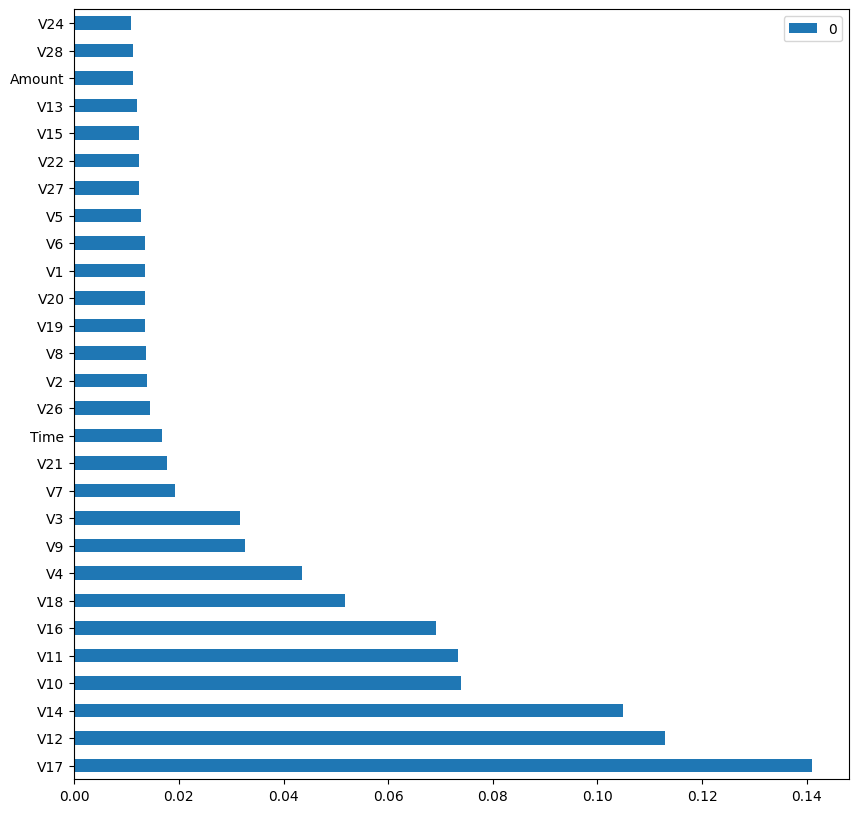

In [39]:
features=pd.DataFrame(model.feature_importances_,index=x.columns)
features.nlargest(28,features).plot(kind="barh",figsize=(10,10))# we have total 28 features

In [40]:
plots.index

Index(['V17', 'V12', 'V14', 'V11', 'V10', 'V16', 'V3', 'V18', 'V4', 'V9', 'V7',
       'V21', 'Time', 'V26', 'V2', 'V19', 'V5', 'V8', 'V20', 'V22'],
      dtype='object')

In [41]:
cols=['V17', 'V10', 'V14', 'V12', 'V11', 'V3', 'V4', 'V16', 'V9', 'V7', 'V26',
       'V1', 'V18', 'V2', 'Time', 'V24', 'V6', 'V21', 'V15', 'V8']
x_new=x[cols]

In [42]:
x_new.head()

,V17,V10,V14,V12,V11,V3,V4,V16,V9,V7,V26,V1,V18,V2,Time,V24,V6,V21,V15,V8
0,0.207971,0.090794,-0.311169,-0.617801,-0.551600,2.536347,1.378155,-0.470401,0.363787,0.239599,-0.189115,-1.359807,0.025791,-0.072781,0.0,0.066928,0.462388,-0.018307,1.468177,0.098698
1,-0.114805,-0.166974,-0.143772,1.065235,1.612727,0.166480,0.448154,0.463917,-0.255425,-0.078803,0.125895,1.191857,-0.183361,0.266151,0.0,-0.339846,-0.082361,-0.225775,0.635558,0.085102
2,1.109969,0.207643,-0.165946,0.066084,0.624501,1.773209,0.379780,-2.890083,-1.514654,0.791461,-0.139097,-1.358354,-0.121359,-1.340163,1.0,-0.689281,1.800499,0.247998,2.345865,0.247676
3,-0.684093,-0.054952,-0.287924,0.178228,-0.226487,1.792993,-0.863291,-1.059647,-1.387024,0.237609,-0.221929,-0.966272,1.965775,-0.185226,1.0,-1.175575,1.247203,-0.108300,-0.631418,0.377436
4,-0.237033,0.753074,-1.119670,0.538196,-0.822843,1.548718,0.403034,-0.451449,0.817739,0.592941,0.502292,-1.158233,-0.038195,0.877737,2.0,0.141267,0.095921,-0.009431,0.175121,-0.270533


In [43]:
x.shape

(284807, 30)

In [44]:
x_new.shape

(284807, 20)

In [45]:
# the thing is feature selection is done for x,y sets i.e all 28 features are selected whereas x_new,y_new has only 20 features which are important and at last test accuracy of both if they make nom large diff continue with x_new,y_new else go back and do with x,y


splitting the data

In [46]:
skf=StratifiedKFold(n_splits=10)


In [47]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [48]:
for train_index,test_index in skf.split(x_new,y):
    x_new_train,x_new_test=x_new.iloc[train_index],x.iloc[test_index]
    y_new_train,y_new_test=y.iloc[train_index],y.iloc[test_index]

In [49]:
x_train.shape

(256327, 30)

In [50]:
x_new_train.shape

(256327, 20)

In [51]:
decision=DecisionTreeClassifier()
randomf=RandomForestClassifier()

RandomForestClassifier-HyperParameter Tuning

In [52]:
n_estimators=[int(i) for i in np.linspace(100,2000,20)]
max_features=["sqrt","log2"]
max_depth=[int(i) for i in np.linspace(5,30,5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [53]:
parameter={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [54]:
parameter

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [5, 11, 17, 23, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [55]:
rf_model = RandomizedSearchCV(estimator=randomf, param_distributions=parameter, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=2, random_state=42)


Auto ML using LazyPredict

In [57]:
# rf_model.fit(x_train,y_train)# hyper patrameyer tuning got difficult for sahil (instrctr)too so skip this and just train the model and so on

In [58]:
randomf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred=randomf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred)

0.999438202247191

In [63]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256349,157651.0,-0.131055,0.892624,-0.482924,-0.186361,0.803878,-1.231911,0.751297,-0.231256,-0.138539,...,-0.242765,0.366923,1.090996,-0.259874,-0.000605,-0.486226,-0.203214,-0.090380,0.105681,7.37
256350,157651.0,-0.210002,1.507891,-1.864282,-0.516231,0.751881,-0.638984,-0.126320,-2.584091,-0.819442,...,0.326594,-1.015332,1.114747,0.167665,0.729468,-0.331569,0.499901,-0.198667,-0.034644,0.76
256351,157651.0,-2.301312,1.470114,0.969136,2.183201,-0.863391,1.151955,-2.294517,-4.776261,-1.405411,...,1.287885,-2.641023,0.663855,0.358991,-0.039249,-0.024862,-0.377762,0.213168,-0.199976,51.00
256352,157652.0,0.884764,-3.815676,-1.399652,-1.074150,-2.117645,0.056226,-0.575882,-0.240249,-1.028288,...,1.119813,0.456788,0.143629,-0.434297,0.509651,-0.515992,-0.160520,-0.100655,0.092501,746.50


In [64]:
y_train

,Class
0,0
1,0
2,0
3,0
4,0
...,...
256349,0
256350,0
256351,0
256352,0


In [65]:
y_test

,Class
243749,1
243848,1
244004,1
244333,1
245347,1
...,...
284802,0
284803,0
284804,0
284805,0


In [66]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
243749,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,-0.181455,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00
243848,152098.0,-4.124316,3.748597,-7.926507,7.763242,-0.769375,-2.031171,-3.474549,0.107121,-1.551352,...,-0.181979,0.547097,0.687854,0.429939,-0.620601,-0.369688,0.367349,-2.664767,0.417101,1.00
244004,152165.0,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,...,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1.00
244333,152307.0,-5.222968,4.641827,-8.858204,7.723502,-1.507035,-2.159484,-4.205164,0.979334,-1.505637,...,-0.176673,0.561892,0.624207,0.536429,-0.628334,-0.222651,0.382208,-2.693036,0.407935,1.00
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


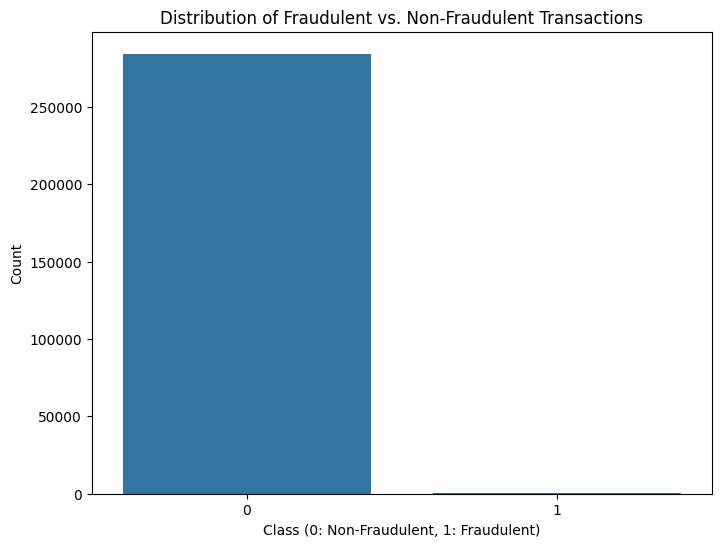

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

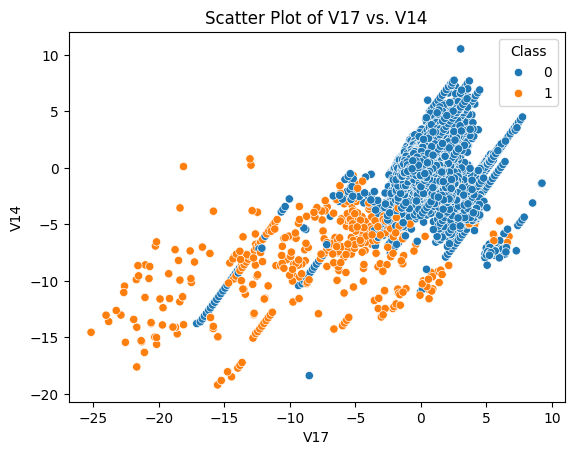

In [68]:
sns.scatterplot(x='V17', y='V14', hue='Class', data=df)
plt.title('Scatter Plot of V17 vs. V14')
plt.show()